# What is the most optimal skill to learn for Data Engineers?
## Methodology
1. Group skills to determine median salary and likelihood of being in posting.
2. Visualise median salary vs percent skill demand.
3. Determine if certain technologies are more prevalent.


In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/home/munchymahesh/Desktop/Python/Data_Project_On_Python/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_DE_AUS = df[(df['job_country']=='Australia') & (df['job_title_short']=='Data Engineer')].copy()  # Filtering for Data Engineer jobs in Australia
df_DE_AUS = df_DE_AUS.dropna(subset=['salary_year_avg']) # Dropping rows with missing salary info

In [5]:
df_DE_AUS_exploded = df_DE_AUS.explode('job_skills')  # Exploding job skills for trend analysis
df_DE_AUS_exploded[['salary_year_avg','job_skills']].head(5)  # Displaying salary and skills columns

,salary_year_avg,job_skills
27637,147500.0,sql
27637,147500.0,python
27637,147500.0,atlassian
70312,125000.0,python
70312,125000.0,sql


In [10]:
# Analyzing top skills for Data Engineers in Australia based on count of skills occurrences
df_DE_skills = df_DE_AUS_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending=False)
df_DE_skills = df_DE_skills.rename(columns={'count':'skill_count','median':'median_salary'}) # Renaming columns for clarity

# Calculating percentage of job postings requiring each skill
DE_job_counts = len(df_DE_AUS) 
df_DE_skills['skill_percent'] = df_DE_skills['skill_count'] / DE_job_counts * 100 #New Column for percentage
df_DE_skills.head(10)

,skill_count,median_salary,skill_percent
job_skills,,,
sql,22,100363.25,73.333333
python,20,106712.50,66.666667
aws,12,118000.00,40.000000
azure,12,100354.00,40.000000
gcp,6,96773.00,20.000000
snowflake,6,97108.50,20.000000
go,5,131580.00,16.666667
docker,4,96773.00,13.333333
java,4,96773.00,13.333333


In [23]:
# Filtering skills that appear in at least 10% of job postings for avoiding clogging on visualization
skill_percent = 13
df_DE_skills_high_demand = df_DE_skills[df_DE_skills['skill_percent'] >= skill_percent]

df_DE_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,22,100363.25,73.333333
python,20,106712.50,66.666667
aws,12,118000.00,40.000000
azure,12,100354.00,40.000000
gcp,6,96773.00,20.000000
snowflake,6,97108.50,20.000000
go,5,131580.00,16.666667
docker,4,96773.00,13.333333
java,4,96773.00,13.333333


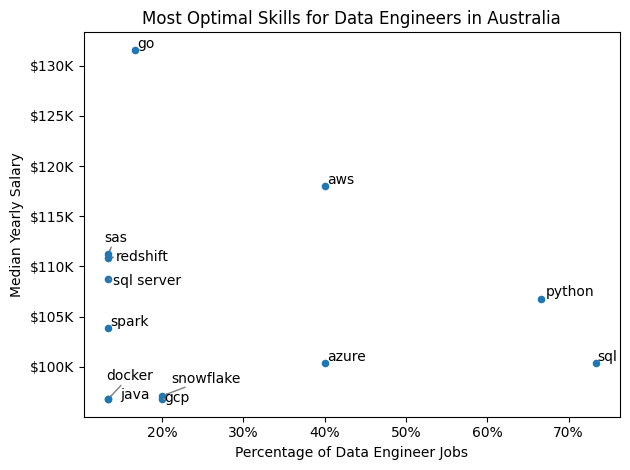

In [31]:
from adjustText import adjust_text
df_DE_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')
texts = []
for i, txt in enumerate(df_DE_skills_high_demand.index):
    texts.append(plt.text(df_DE_skills_high_demand['skill_percent'].iloc[i], df_DE_skills_high_demand['median_salary'].iloc[i], txt))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))
     
# Set axis labels, title, and legend
plt.xlabel('Percentage of Data Engineer Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Engineers in Australia')

from matplotlib.ticker import PercentFormatter
# Get current axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f'${int(y/1000)}K'))  # Formatting y-axis as currency
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))  # Formatting x-axis as percentage   

# Adjust layout and display plot 
plt.tight_layout()
plt.show()

### Color coded Skills based off the technology

In [ ]:
#Forming a technology dictionary from job_type_skills column
df_technology =df_DE_AUS['job_type_skills'].copy()
#remove dupes
df_technology =df_technology.drop_duplicates()
#remove NaN
df_technology = df_technology.dropna()

#combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row) # Convert string representation of dictionary to actual dictionary
    for key,value in row_dict.items():
        if key in technology_dict:
            technology_dict[key] += value # Accumulate values for duplicate keys
        else:
            technology_dict[key] = value # Add new key-value pair


#remove duplicates by coverting values to set then back to list
for key in technology_dict:
    technology_dict[key] = list(set(technology_dict[key]))

technology_dict                  

{'other': ['docker',
  'terraform',
  'jenkins',
  'bitbucket',
  'github',
  'kubernetes',
  'atlassian',
  'git',
  'pulumi'],
 'programming': ['java',
  'typescript',
  'scala',
  'golang',
  'matlab',
  'sql',
  'elixir',
  'powershell',
  'haskell',
  'sas',
  'python',
  'rust',
  'go',
  'nosql',
  'assembly',
  'c',
  'r'],
 'cloud': ['snowflake',
  'azure',
  'oracle',
  'gcp',
  'aws',
  'redshift',
  'bigquery',
  'databricks'],
 'databases': ['sql server', 'elasticsearch'],
 'libraries': ['hadoop',
  'pytorch',
  'opencv',
  'tensorflow',
  'flutter',
  'spark',
  'airflow',
  'react',
  'pandas',
  'numpy',
  'nltk',
  'kafka',
  'pyspark'],
 'analyst_tools': ['word', 'power bi', 'sas', 'ssis', 'alteryx', 'tableau'],
 'webframeworks': ['node.js', 'express'],
 'async': ['jira']}

In [38]:
# Creating a dataframe from technology dictionary
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology','skills']) #Converting technology dictionary to dataframe for better visualization
df_technology = df_technology.explode('skills')
df_technology.head(10)  


,technology,skills
0,other,docker
0,other,terraform
0,other,jenkins
0,other,bitbucket
0,other,github
0,other,kubernetes
0,other,atlassian
0,other,git
0,other,pulumi
1,programming,java


In [42]:
#Merging skills dataframe with technology dataframe for better visualization
df_plot = df_DE_skills_high_demand.merge(df_technology,left_on='job_skills',right_on='skills') 

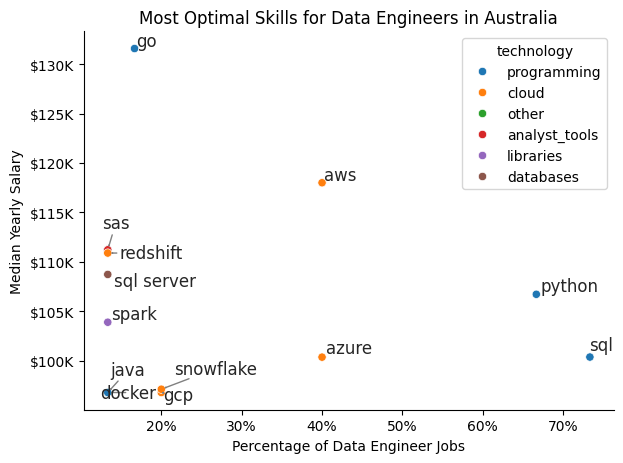

In [44]:
from adjustText import adjust_text
#df_DE_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')
sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology'

)

sns.despine()
sns.set_theme(style="ticks")

# Preparing text annotations
texts = []
for i, txt in enumerate(df_DE_skills_high_demand.index):
    texts.append(plt.text(df_DE_skills_high_demand['skill_percent'].iloc[i], df_DE_skills_high_demand['median_salary'].iloc[i], txt))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))
     
# Set axis labels, title, and legend
plt.xlabel('Percentage of Data Engineer Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Engineers in Australia')

from matplotlib.ticker import PercentFormatter
# Get current axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f'${int(y/1000)}K'))  # Formatting y-axis as currency
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))  # Formatting x-axis as percentage   

# Adjust layout and display plot 
plt.tight_layout()
plt.show()